<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.**

**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

**The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

**Variables**:

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

# **Data Description**

**Variables**:

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

**Demographic:**
* `Sex`: male or female("M" or "F")
* `Age`: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* `is_smoking`: whether or not the patient is a current smoker ("YES" or "NO")
* `Cigs Per Day`: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* `BP Meds`: whether or not the patient was on blood pressure medication (Nominal)
* `Prevalent Stroke`: whether or not the patient had previously had a stroke (Nominal)
* `Prevalent Hyp`: whether or not the patient was hypertensive (Nominal)
* `Diabetes`: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* `Tot Chol`: total cholesterol level (Continuous)
* `Sys BP`: systolic blood pressure (Continuous)
* `Dia BP`: diastolic blood pressure (Continuous)
* `BMI`: Body Mass Index (Continuous)
* `Heart Rate`: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* `Glucose`: glucose level (Continuous)
Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -**


##**Importing and Loading Data**

In [104]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [105]:
#Importing Cardiovascular Risk Prediction dataset into Pandas Dataframe
crp_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Cardiovascular Risk Prediction - Abhishek Shubham/data_cardiovascular_risk.csv')

##**Exploring Data Frame**

In [106]:
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [107]:
crp_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [108]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [109]:
# Checking the shape of data
print(f'CRP dataset has {crp_df.shape[0]} rows and {crp_df.shape[1]} columns.')

CRP dataset has 3390 rows and 17 columns.


In [110]:
#Descriptive Statistics
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [111]:
# Missing Values in each columns
crp_df.isnull().sum().sort_values(ascending= False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

**Findings:**

* Glucose has the maximum missing values which is 304 followed by 'education', 'BPmeds' and 'totChol'.
* Total 7 columns has missing values and 'heartRate' has the lowest missing value which is 1.

In [112]:
# Checking for duplicate values in the dataset
len(crp_df[crp_df.duplicated()])

0

Look's like there are no duplicate values.

#**Data Preprocessing**

We drop the education and id columns because it has no relation while predicting heart disease.

In [113]:
crp_df.drop(['id', 'education'], axis= 1, inplace= True)

In [114]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [115]:
#Encoding string categorical variable to int with binary inputs(0,1)
crp_df['sex']= [0 if i=='F' else 1 for i in crp_df['sex']]
crp_df['is_smoking']= [0 if i== 'NO' else 1 for i in crp_df['is_smoking']]

In [116]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##**Handling Missing Values**

In [117]:
# percentage of missing data per category
total = crp_df.isnull().sum().sort_values(ascending=False)
percent_total = (crp_df.isnull().sum()/crp_df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


In [118]:
missing_data.index

Index(['glucose', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'], dtype='object')

In [119]:
# let's count the all rows which are having missing values 
count=0
for i in crp_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print(f'Total precentage of missing values in the entire dataset is {round((count/len(crp_df.index))*100)}')

Total number of rows with missing values is  386
Total precentage of missing values in the entire dataset is 11


At 8.97%, the blood glucose entry has the highest percentage of missing data. The other features have very few missing entries as compared to Glucose.

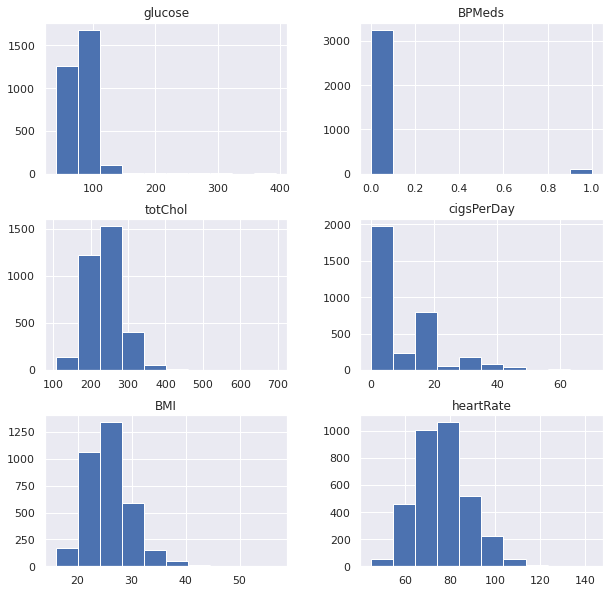

In [120]:
#Checking the distribution for missing data
sns.set(style='darkgrid')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
crp_df[missing_data.index].hist(ax= ax)
plt.show()

From above distributions it's clearly visible that most of the data are right skewed. So for skewed data median and mode are suitable to impute the missing values.

In [121]:
#Replacing missing values with median or mode depending on column category

crp_df['heartRate']= crp_df['heartRate'].fillna(value=crp_df['heartRate'].median())

crp_df['BMI']= crp_df['BMI'].fillna(crp_df['BMI'].median())

mean_cigsPerDay= round(crp_df[crp_df['is_smoking'] == 1]['cigsPerDay'].mean(), 0)
crp_df['cigsPerDay']= crp_df['cigsPerDay'].fillna(mean_cigsPerDay)

median_totChol= crp_df['totChol'].median()
crp_df['totChol']= crp_df['totChol'].fillna(median_totChol)

mode_BPMeds= crp_df['BPMeds'].mode()[0]
crp_df['BPMeds'].fillna(mode_BPMeds, inplace= True)

median_glucose= crp_df['glucose'].median()
crp_df['glucose'].fillna(median_glucose, inplace= True)

In [122]:
#Checking for the presence of missing values after imputations
crp_df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

After the above imputations we can say that all the missings values are successfully removed from our dataset.

#**Exploratory Data Analysis**

##Univariate Analysis

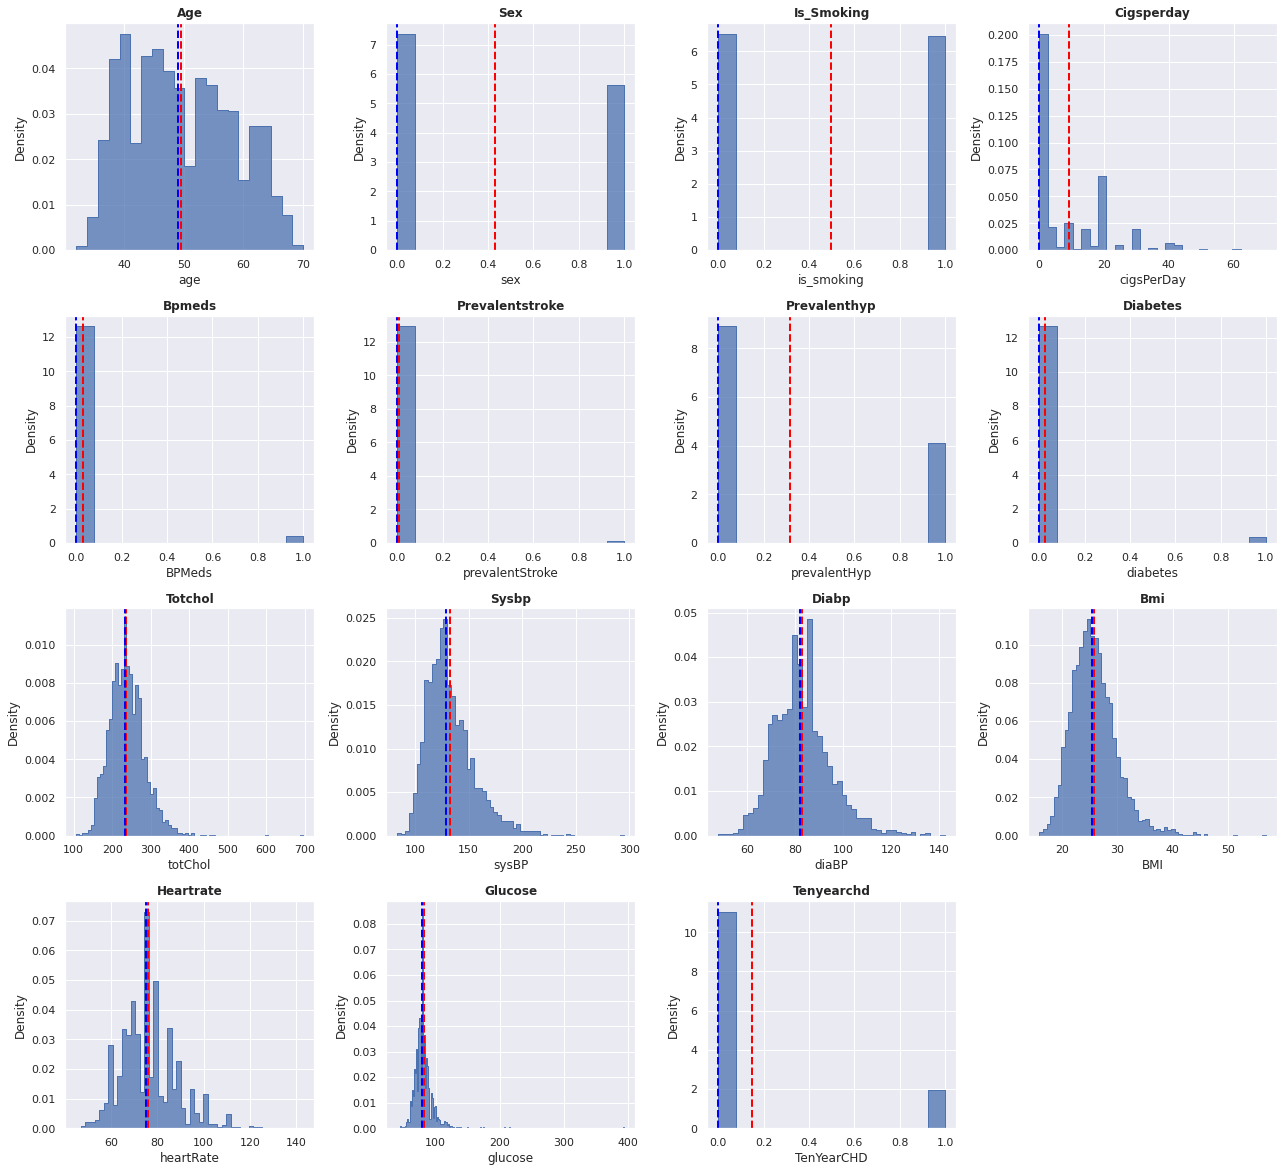

In [123]:
#Visualizing the mean and median and distribution of all the feature

plt.figure(figsize=(18,20))
features= list(crp_df.columns)
sns.set(style='darkgrid')
for n, col in enumerate(features):
  feature = crp_df[col]
  ax=plt.subplot(5, 4, n+1)
  # fig, ax = plt.subplots()
  sns.histplot(crp_df[col], ax= ax, stat= 'density', element= 'step'  )
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()


From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced. Also continuous features like totChol , sysBP, BMI etc are right skewed.

In [124]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [125]:
# Visualizing the dependent variable 'TenYearCHD'
crp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Cardiovascular Risk rate')

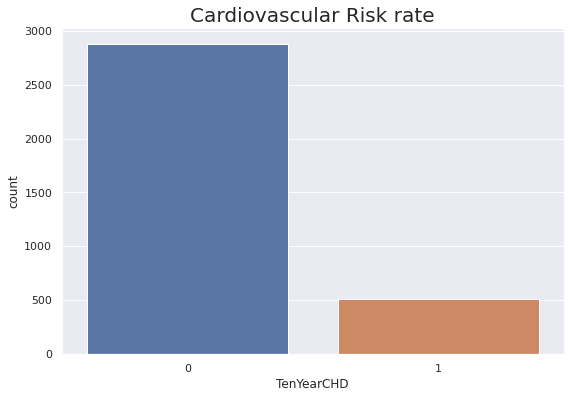

In [126]:
# Visualising dependent variable 'TenYearCHD' using countplot and Pie-chart
plt.figure(figsize= (9, 6))
sns.countplot(x= 'TenYearCHD', data= crp_df)
plt.title('Cardiovascular Risk rate',size = 20)

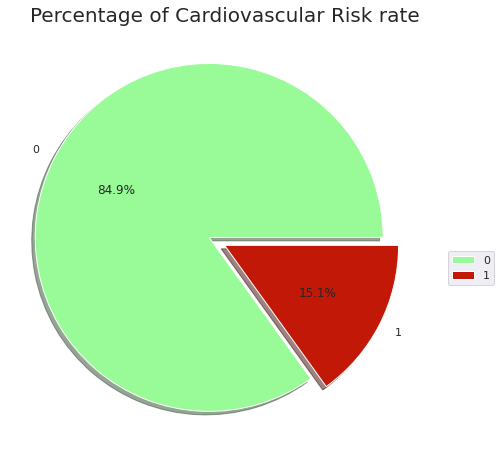

In [127]:
# Pie Chart for Type column
plt.figure(figsize=(10,8))
labels = crp_df['TenYearCHD'].value_counts(sort = True).index
sizes = crp_df['TenYearCHD'].value_counts(sort = True)
colors = ["#98FB98","#C21807"]
explode = (0.1,0)
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Cardiovascular Risk rate',size = 20)
plt.legend(labels= labels, bbox_to_anchor=(1,0.5))
plt.show()

**Findings:**

* It's clearly visible that there is a class imbalance problem with our datset!
* Number of people without the disease greatly exceeds the number of people with the disease.
* An imbalance occurs when one or more classes have very low proportions in the training data as compared to the other classes.

* Problems with Class Imbalance problem is that the abundance of examples from the majority class (or classes) can swamp the minority class. Most machine learning algorithms for classification predictive models are designed and demonstrated on problems that assume an equal distribution of classes.

In [128]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of Male VS Female')

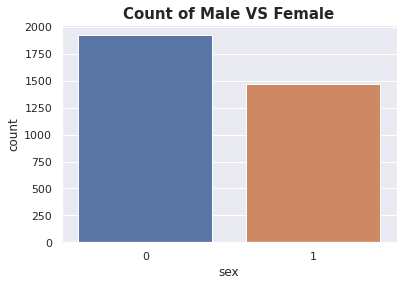

In [129]:
#Visualising the 'Sex' feature using sns countplot

sns.countplot(x= 'sex', data= crp_df )
plt.title('Count of Male VS Female', size= 15, weight='bold')

In our dataset the records of female are more than men.

Text(0.5, 1.0, 'No of people smoking vs not smoking')

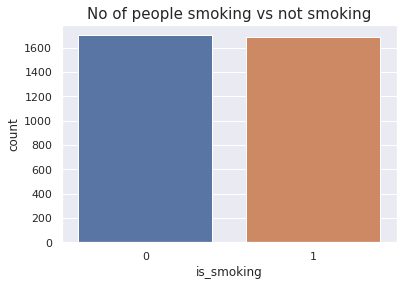

In [130]:
# Peple smoking vs not smoking(1: Yes, 0: No)

sns.countplot(x= 'is_smoking', data= crp_df )
plt.title('No of people smoking vs not smoking', size= 15)

Number of people who smokes vs people who doesn't is almost similar in the dataset.

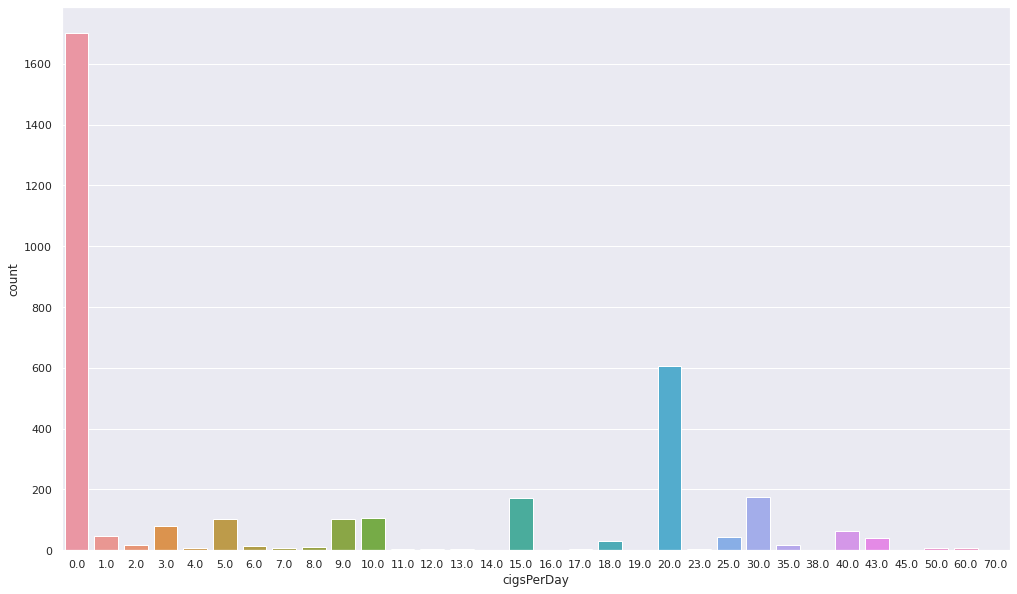

In [131]:
plt.figure(figsize= (17, 10))
sns.countplot(x= 'cigsPerDay', data= crp_df)

From the above countplot it can be said that most of the people don't smoke cigrates. Among people who smokes cigrates, most of them smokes 20 cigrates per day, followed by 30 cigrates , 15 cigrates etc.

In [132]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of people who previously had Stroke')

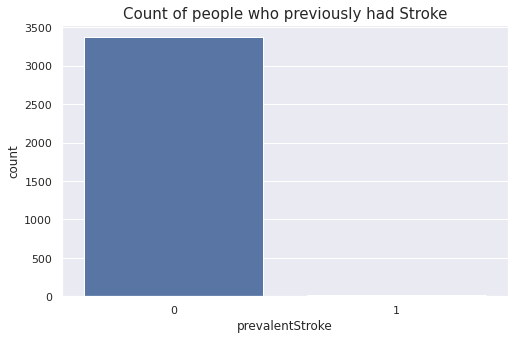

In [133]:
#Visualizing 'prevalentStroke' feature using Sns countplot method
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentStroke', data= crp_df )
plt.title('Count of people who previously had Stroke', size= 15)

In [134]:
crp_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

Number of people having Stroke in past is very less which is 22 vs number of people who didn't have stroke.

Text(0.5, 1.0, 'Count of people who previously had Hypertension')

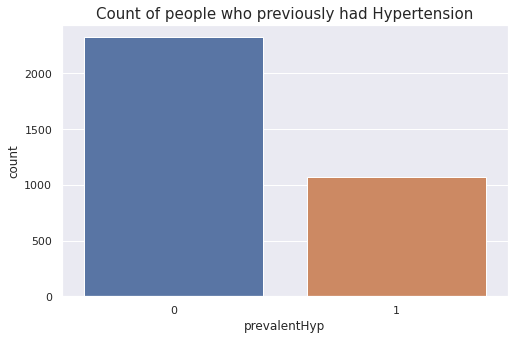

In [135]:
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentHyp', data= crp_df )
plt.title('Count of people who previously had Hypertension', size= 15)

In [136]:
crp_df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [137]:
len(crp_df.index)

3390

* Out of 3390 patients from the records 1069 people had Hypertension before.

* In Medical terms High blood pressure (hypertension) is a common condition in which the long-term force of the blood against your artery walls is high enough that it may eventually cause health problems, such as heart disease.

* From medical point of view it can be said that people with hypertension are more likely to have heart disease in future.

Text(0.5, 1.0, 'Count of people who had diabetes')

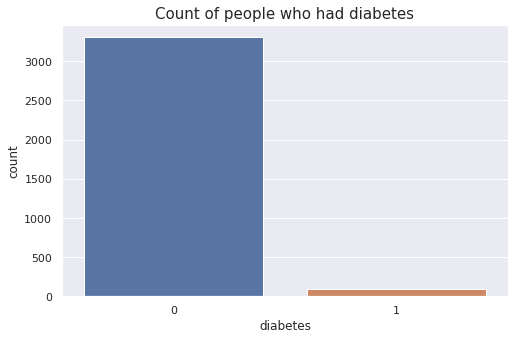

In [138]:
# Visualizing 'diabetes' column
plt.figure(figsize= (8, 5))
sns.countplot(x= 'diabetes', data= crp_df )
plt.title('Count of people who had diabetes', size= 15)

In [139]:
crp_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

* Out of 3390 patients from our records 87 people had diabetes.

* **Interesting fact about diabetes is that if a person have diabetes, then they are twice as likely to have heart disease or a stroke than someone who doesn't have diabetes—and at a younger age. The longer anyone have diabetes, the more likely they are to have heart disease.**

In [140]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


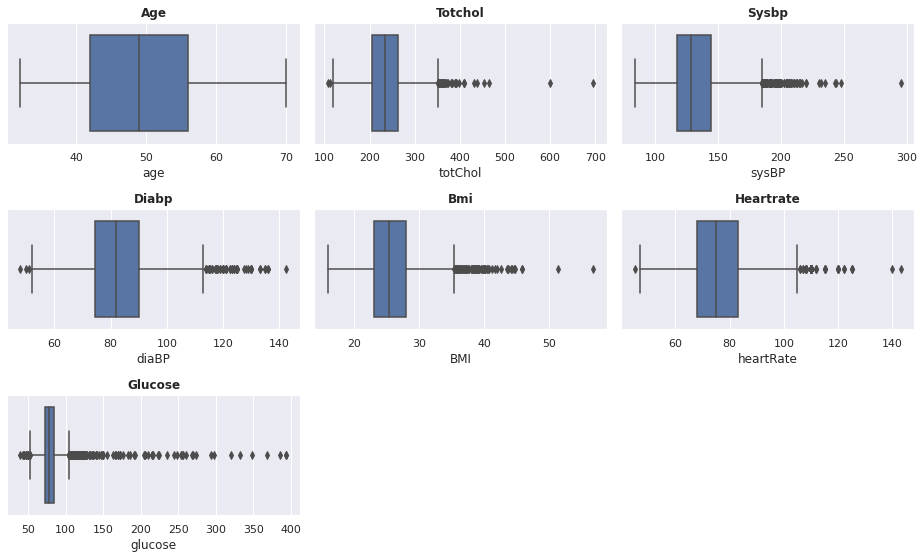

In [141]:
# Barplot of continious variables
cont_features= ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize= (13,10))
for n, col in enumerate(cont_features):
  ax=plt.subplot(4, 3, n+1)
  # fig, ax = plt.subplots()
  sns.boxplot(crp_df[col], ax= ax, palette='deep')
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

**Findings:**

- The median age of the patients is 49.

- Except age all other continious features have outliers.

## Bivariate & Multivariate Analysis

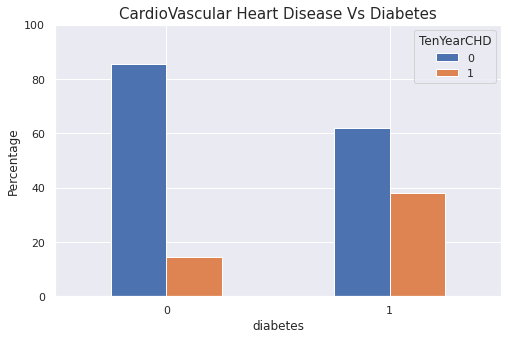

In [142]:
# Percentage of Cardiovascular Risk with or without diabetes
freq_df = crp_df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.title('CardioVascular Heart Disease Vs Diabetes', size= 15)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

From the above barplot it's quite evident that diabetic patients tend to have higher 10 year Risk of CHD.

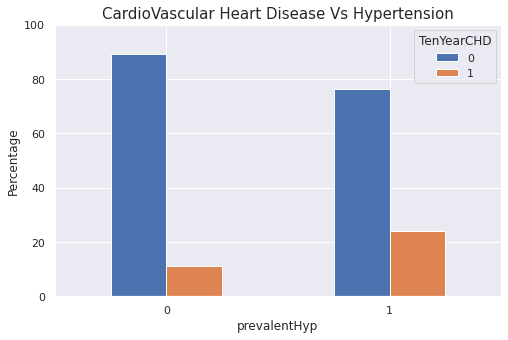

In [143]:
# Percentage of Cardiovascular Risk with or without previous hypertension
freq_df = crp_df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.title('CardioVascular Heart Disease Vs Hypertension', size= 15)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='TenYearCHD', loc='upper right')
plt.show()

Hypertensive patients tend to have higher risk of 10 Year CHD.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

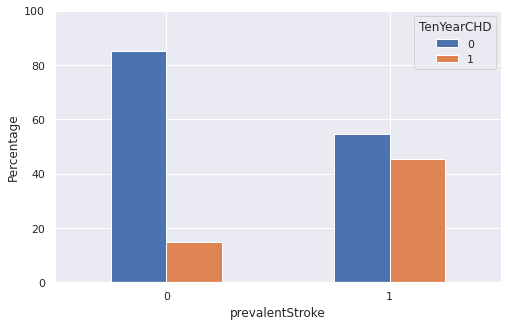

In [144]:
# Percentage of Cardiovascular Risk with or without previous stroke
freq_df = crp_df.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar",  figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Patients with prevalent stroke symptoms have a high 10-year risk of CHD.

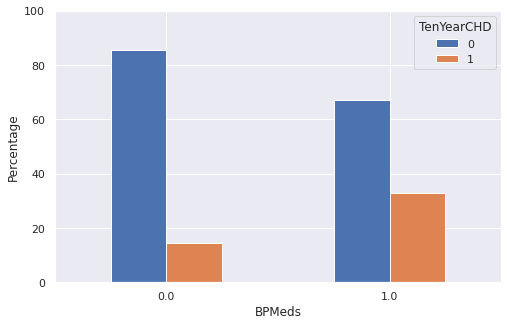

In [145]:
# Percentage of Cardiovascular Risk with or without Blood Pressure Medication
freq_df = crp_df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Patients on Blood Preasure medication have higer risks of getting 10 year CHD as compared to patients who were not on medications.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

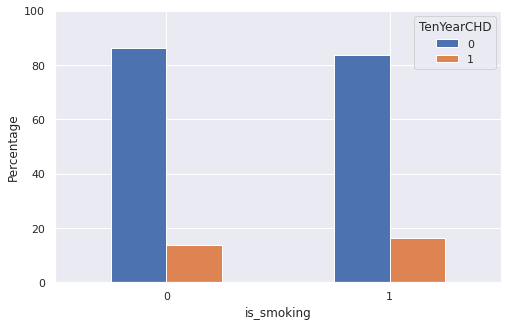

In [146]:
# Percentage of Cardiovascular Risk on smokers vs non smokers
freq_df = crp_df.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)


Patients who are smokers vs non-smokers shows similar risks of 10 Year CHD as per the above bar plot

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

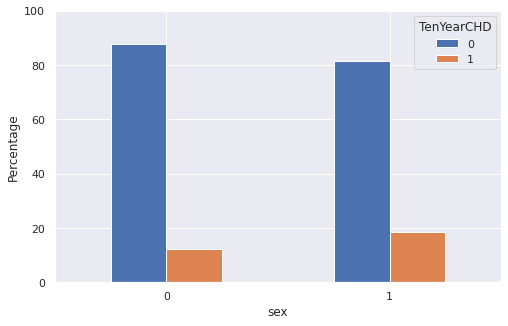

In [147]:
# Percentage of Cardiovascular Risk on male Vs female
freq_df = crp_df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

As per the above visualization Males has slight higher risk of having 10 Year CHD.

In [148]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


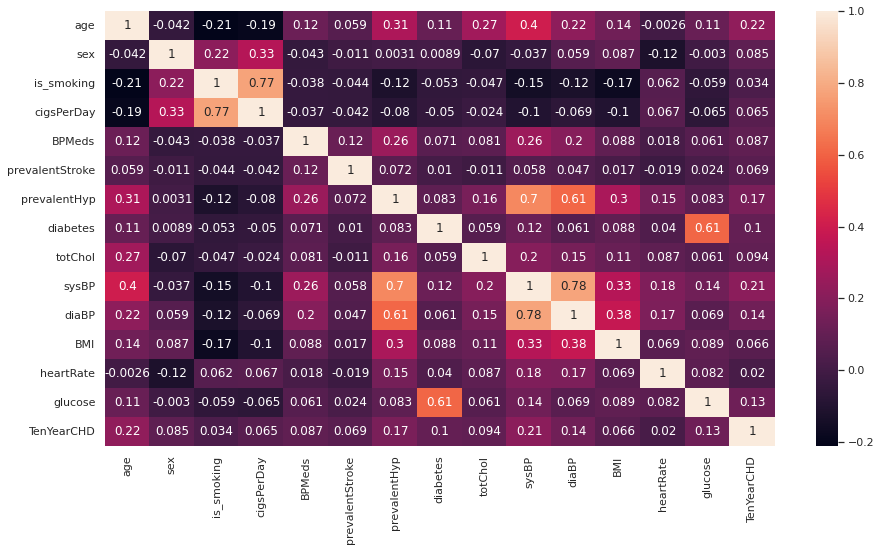

In [149]:
#Checking the coorelation between all the features
plt.figure(figsize=(15,8))
sns.heatmap(crp_df.corr(), annot = True)
plt.show()

From the above correlation plot we can conclude that,

* There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

* Also there are a couple of features that are highly correlated with each other and for model building it's best to pick features which are independent of each other.

Coorelated independent features includes:

* Blood glucose and diabetes
* systolic and diastolic blood pressures
* cigarette smoking and the number of cigarretes smoked per day


# **Feature Engineering**

In [150]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [151]:
df2= crp_df.copy()

In [152]:
# Creating new feature avgBP from sysBP and diaBP
df2['avg_BP']= (df2['sysBP'] + df2['diaBP'])/2

In [153]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,avg_BP
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,116.50
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,110.75


In [154]:
#Dropping sysBP and diaBP feature
df2.drop(['sysBP', 'diaBP'], axis= 1, inplace= True)

In [155]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avg_BP
0,64,0,1,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,116.50
1,36,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,110.75


# **Handling Class Imbalance Problem**

Since our dataset is imbalanced i.e for every positive case there are about 5-6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall.

To handle this problem we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE).

**SMOTE :**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

**SMOTE** algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [156]:
#define the features
X = df2.drop('TenYearCHD', axis= 1)
y = df2['TenYearCHD']

In [157]:
len(X.columns)

13

In [158]:
# Applying smoothing technique to handle imbalance target class
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df2))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [159]:
x_smote.shape

(5758, 13)

In [160]:
y_smote.shape

(5758,)

In [161]:
#Spilliting the data into train and validation sets
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [162]:
# Function to get train and test accuracy and Roc score!
def evaluation_metrics(train_preds, test_preds):

  train_accuracy = accuracy_score(y_train,train_preds)
  test_accuracy = accuracy_score(y_test,test_preds)
  train_aoc= roc_auc_score(y_train,train_preds)
  test_aoc= roc_auc_score(y_test,test_preds)

  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)

  print("\nThe aoc score on train data is:", train_aoc)
  print("The aoc score on test data is:", test_aoc) 

In [163]:
#Function to get Confusion matrix

def conf_mtrx( test_preds):

  cm=confusion_matrix(y_test, test_preds)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [164]:
#Function to get the AUC curve

def roc_auc(clf):

  # ROC curve and AUC
  probs = clf.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # calculate AUC
  log_auc = roc_auc_score(y_test, probs)

  # calculate roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  # plot curve
  sns.set_style('whitegrid')
  plt.figure(figsize=(10,6))
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.ylabel('True positive rate')
  plt.xlabel('False positive rate')
  plt.title(f"AUC = {round(log_auc,3)}")
  plt.show()

#Supervised ML Classification Models

The five algorithms that we will be using are:

1. **Logistic Regression**
2. **Decision Trees**
3. **Random Forrest**
4. **XGBoost**
5. **Support Vector Machine**


Here, we will be using **GridsearchCV** search algorithm for above algorithms.

## **Logistic Regression**

In [165]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [166]:
#logistic regression model 
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(fit_intercept=True, max_iter=10000, random_state= 0)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [167]:
clf_lr.score(X_train, y_train)

0.676943117672601

In [168]:
train_preds_lr= clf_lr.predict(X_train) 
test_preds_lr= clf_lr.predict(X_test)
evaluation_metrics(train_preds_lr, test_preds_lr)

The accuracy on train data is  0.676943117672601
The accuracy on test data is  0.6692708333333334

The aoc score on train data is: 0.6768690936790581
The aoc score on test data is: 0.6693571004230913


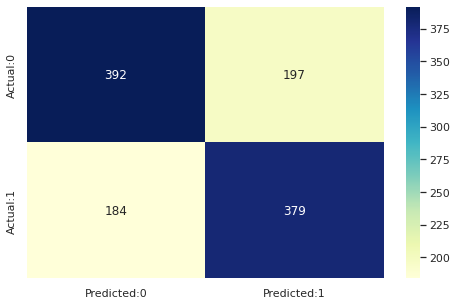

In [169]:
# confusion matrix of Logistic Model
conf_mtrx(test_preds_lr)

In [170]:
print(classification_report(y_test,test_preds_lr))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       589
           1       0.66      0.67      0.67       563

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



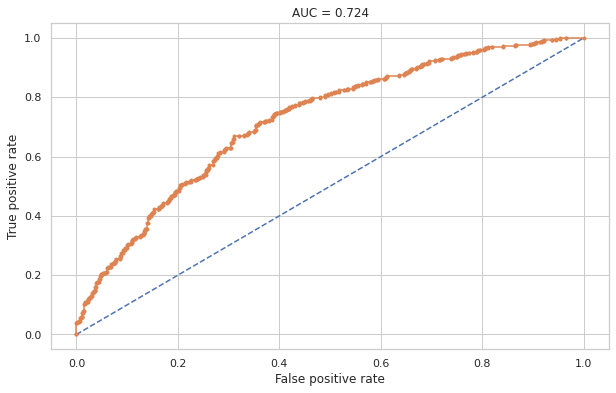

In [171]:
# Roc_Auc curve for Logistic Regression model
roc_auc(clf_lr)

## **Decision Trees**

In [172]:
#Defining the set of parameters for Decision Tree Model
param_dict= {'criterion': ['gini', 'entropy'],
                'max_depth': [4, 5, 6],
                'min_samples_leaf': [20, 30, 40, 50],
                'min_samples_split': [30, 40, 50, 100, 150]}

In [173]:
dt_grid= GridSearchCV(DecisionTreeClassifier(random_state= 0), param_grid= param_dict, cv= 5)

dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [30, 40, 50, 100, 150]})

In [174]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 30}

In [175]:
dt_grid.score(X_train, y_train)

0.7227529309596179

In [176]:
train_preds_dt_gd= dt_grid.predict(X_train) 
test_preds_dt_gd= dt_grid.predict(X_test)
evaluation_metrics(train_preds_dt_gd, test_preds_dt_gd)

The accuracy on train data is  0.7227529309596179
The accuracy on test data is  0.7013888888888888

The aoc score on train data is: 0.7227232617598479
The aoc score on test data is: 0.7012759079271547


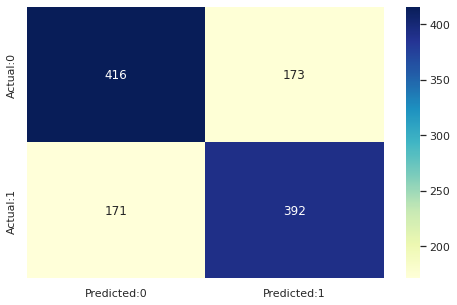

In [177]:
conf_mtrx(test_preds_dt_gd)

In [178]:
print(classification_report(y_test,test_preds_dt_gd))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       589
           1       0.69      0.70      0.70       563

    accuracy                           0.70      1152
   macro avg       0.70      0.70      0.70      1152
weighted avg       0.70      0.70      0.70      1152



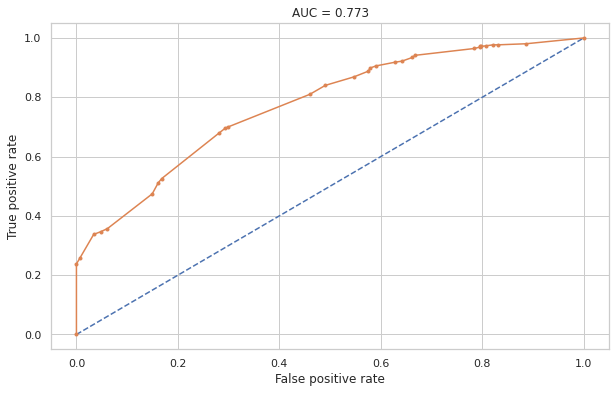

In [179]:
# ROC curve and AUC for Decision Tree Model
roc_auc(dt_grid)

## **Random Forest Model**

In [180]:
# search for optimun parameters using gridsearch for Rf model
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(random_state= 0),param_grid= params_rf,cv=10, scoring='roc_auc')
random_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [181]:
random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [182]:
random_clf.score(X_train, y_train)

0.8524496383615779

In [183]:
train_preds_rf_cv= random_clf.predict(X_train)
test_preds_rf_cv= random_clf.predict(X_test)
evaluation_metrics(train_preds_rf_cv, test_preds_rf_cv)

The accuracy on train data is  0.7587928788536691
The accuracy on test data is  0.7213541666666666

The aoc score on train data is: 0.7585167922408007
The aoc score on test data is: 0.7225646623864997


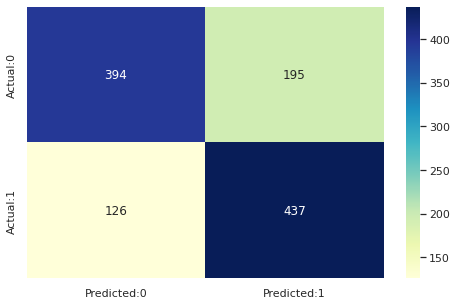

In [184]:
conf_mtrx(test_preds_rf_cv)

In [185]:
print(classification_report(y_test,test_preds_rf_cv))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       589
           1       0.69      0.78      0.73       563

    accuracy                           0.72      1152
   macro avg       0.72      0.72      0.72      1152
weighted avg       0.73      0.72      0.72      1152



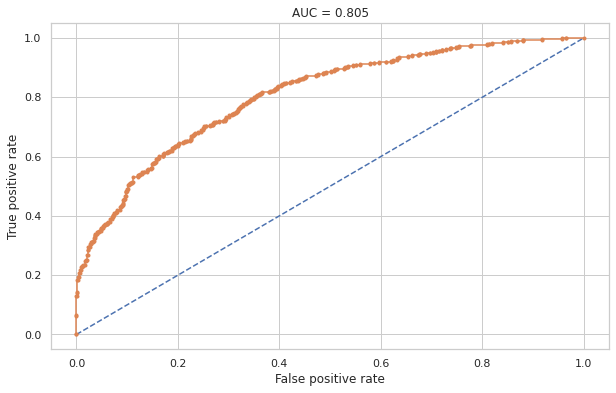

In [186]:
roc_auc(random_clf)

## **XG Boost**

In [187]:
#Changing parameters again to get the best results and remove overfitting issue
param_dict_xgb= {
    'gamma' : [1, 2],
    'max_depth': [4],
    'n_estimators': [60,80,100,120],
    'learning_rate': [0.1,0.2]
}

In [208]:
xgb_grid = GridSearchCV(estimator=XGBClassifier(random_state= 0),
                       param_grid = param_dict_xgb,
                       cv = 5, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'gamma': [1, 2], 'learning_rate': [0.1, 0.2],
                         'max_depth': [4], 'n_estimators': [60, 80, 100, 120]},
             scoring='roc_auc')

In [189]:
xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 120}

In [190]:
xgb_grid.score(X_train, y_train)

0.9822668959431635

In [191]:
train_preds_xgb= xgb_grid.predict(X_train)
test_preds_xgb= xgb_grid.predict(X_test)
evaluation_metrics(train_preds_xgb,test_preds_xgb)

The accuracy on train data is  0.9376899696048632
The accuracy on test data is  0.8619791666666666

The aoc score on train data is: 0.9378485342142378
The aoc score on test data is: 0.8612619757725258


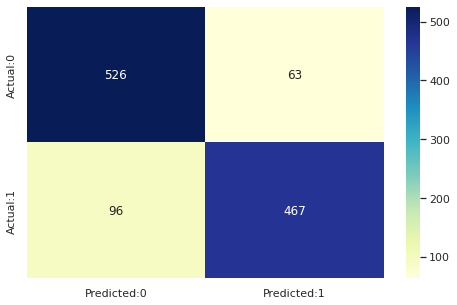

In [192]:
conf_mtrx(test_preds_xgb)

In [193]:
print(classification_report(y_test,test_preds_xgb))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       589
           1       0.88      0.83      0.85       563

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152



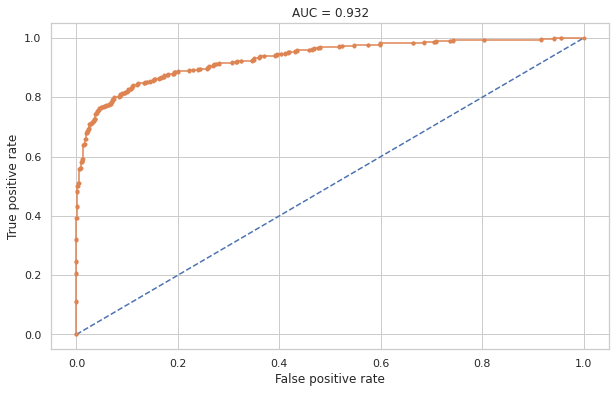

In [194]:
roc_auc(xgb_grid)

##**Support Vector Machine**

In [195]:
# Grid search for optimum parameters
Cs = [5, 6, 7]
gammas = [0.001, 0.01, 0.1, 1]
kernel= ['rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}


In [196]:
svm_clf = GridSearchCV(SVC(probability=True, random_state= 0), param_grid, cv=10)
#training the classifier
svm_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [5, 6, 7], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [209]:
svm_clf.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

In [210]:
train_preds_svc_gd= svm_clf.predict(X_train)
test_preds_svc_gd= svm_clf.predict(X_test)
evaluation_metrics(train_preds_svc_gd, test_preds_svc_gd)

The accuracy on train data is  0.998697351280938
The accuracy on test data is  0.9270833333333334

The aoc score on train data is: 0.9986924074786374
The aoc score on test data is: 0.9273597963854804


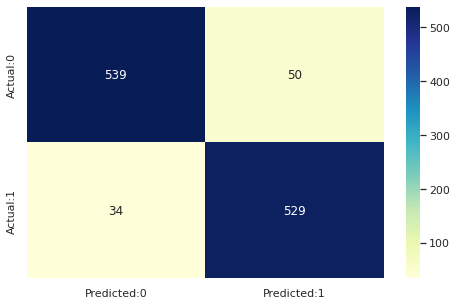

In [199]:
conf_mtrx(test_preds_svc_gd)

In [200]:
print(classification_report(y_test,test_preds_svc_gd))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       589
           1       0.91      0.94      0.93       563

    accuracy                           0.93      1152
   macro avg       0.93      0.93      0.93      1152
weighted avg       0.93      0.93      0.93      1152



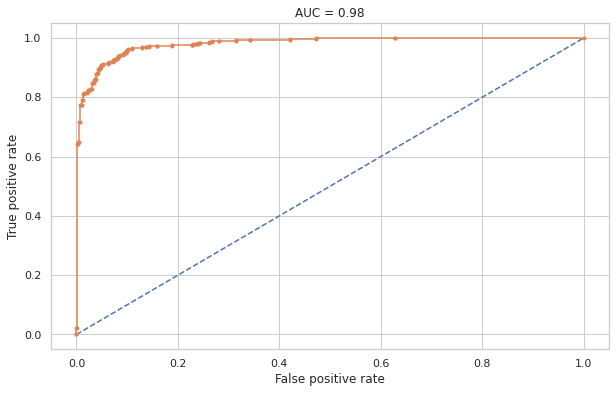

In [201]:
roc_auc(svm_clf)

In [202]:
svm_clf1= SVC(C= 0.000001, gamma= 0.0000001, kernel= 'rbf')
svm_clf1.fit(X_train, y_train)

SVC(C=1e-06, gamma=1e-07)

In [203]:
svm_clf1.score(X_train, y_train)

0.5028224055579679

In [204]:
train_preds_svc= svm_clf.predict(X_train)
test_preds_svc= svm_clf.predict(X_test)
evaluation_metrics(train_preds_svc, test_preds_svc)

The accuracy on train data is  0.998697351280938
The accuracy on test data is  0.9270833333333334

The aoc score on train data is: 0.9986924074786374
The aoc score on test data is: 0.9273597963854804


From all these executions I came to understand one fact about SVC is that when the data is not scaled then SVC model gives the best test results.

#**Model Comparision Matrix**

In [205]:
#Creating a function to store Auc score
def auc_score(clf):

  probs = clf.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # calculate AUC
  log_auc = roc_auc_score(y_test, probs)
  return log_auc

# Creating a dataframe to store the performance of each models
Comparision_df= pd.DataFrame({
    'Logistic Regression' : { 'Train Accuracy': accuracy_score(y_train,train_preds_lr).round(4)*100  , 'Test Accuracy': accuracy_score(y_test,test_preds_lr).round(4)*100 , 'Precision':  precision_score(y_test, test_preds_lr).round(4)*100 , 'Recall': recall_score(y_test, test_preds_lr).round(4)*100 ,'F1_score': f1_score(y_test, test_preds_lr).round(4)*100  , 'AUC': auc_score(clf_lr).round(4)*100 },

    'Decision Trees' : { 'Train Accuracy': accuracy_score(y_train,train_preds_dt_gd).round(4)*100 , 'Test Accuracy': accuracy_score(y_test,test_preds_dt_gd).round(4)*100 , 'Precision':  precision_score(y_test, test_preds_dt_gd).round(4)*100 , 'Recall': recall_score(y_test, test_preds_dt_gd).round(4)*100 ,'F1_score': f1_score(y_test, test_preds_dt_gd).round(4)*100 , 'AUC': auc_score(dt_grid).round(4)*100 },

    'Random Forest' : { 'Train Accuracy': accuracy_score(y_train,train_preds_rf_cv).round(4)*100 , 'Test Accuracy': accuracy_score(y_test,test_preds_rf_cv).round(4)*100 , 'Precision':  precision_score(y_test, test_preds_rf_cv).round(4)*100 , 'Recall': recall_score(y_test, test_preds_rf_cv).round(4)*100 ,'F1_score': f1_score(y_test, test_preds_rf_cv).round(4)*100 , 'AUC': auc_score(random_clf).round(4)*100 },

    'XG Boost' : { 'Train Accuracy': accuracy_score(y_train,train_preds_xgb).round(4)*100 , 'Test Accuracy': accuracy_score(y_test,test_preds_xgb).round(4)*100 , 'Precision':  precision_score(y_test, test_preds_xgb).round(4)*100 , 'Recall': recall_score(y_test, test_preds_xgb).round(4)*100 ,'F1_score':f1_score(y_test, test_preds_xgb).round(4)*100  , 'AUC': auc_score(xgb_grid).round(4)*100 },

    'SVM' : { 'Train Accuracy': accuracy_score(y_train,train_preds_svc_gd).round(4)*100 , 'Test Accuracy': accuracy_score(y_test,test_preds_svc_gd).round(4)*100 , 'Precision':  precision_score(y_test, test_preds_svc_gd).round(4)*100 , 'Recall': recall_score(y_test, test_preds_svc_gd).round(4)*100 ,'F1_score': f1_score(y_test, test_preds_svc_gd).round(4)*100 , 'AUC': auc_score(svm_clf).round(4)*100 },

}).T

In [206]:
Comparision_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1_score,AUC
Logistic Regression,67.69,66.93,65.80,67.32,66.55,72.38
Decision Trees,72.28,70.14,69.38,69.63,69.50,77.35
Random Forest,75.88,72.14,69.15,77.62,73.14,80.53
XG Boost,93.77,86.20,88.11,82.95,85.45,93.18
SVM,99.87,92.71,91.36,93.96,92.64,98.03


#**Analysis Summary**:

* The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.

* The median age of the patients in the dataset is 49.
- Out of 3390 patients from the records 1069 people had Hypertension before.
- Number of people having Stroke in past is very less which is 22 vs number of people who didn't have stroke.
- People having diabetes is very less compared to people who didn't have diabetes.
- Diabetic patients tend to have higher 10 year Risk of CHD vs not Diabetic patients.
- Hypertensive patients are at higher risk of CHD vs patients who are not suffering from hypertension.
- Patients with prevalent stroke symptoms have a high 10-year risk of CHD vs patients without any stroke symptoms.
- Patients on Blood Preasure medication have higer risks of getting 10 year CHD as compared to patients who were not on medications.
- Males has slightly higher risk of having 10 Year CHD vs Female.
- In the dataset number of people without the disease(CHD) greatly exceeds the number of people with the disease.(Creating class imbalance problem)

#**Summary**

* If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.

* Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.

* We have used Logistic Regression, Decision Trees, Random Forest, XGBoost and SVC for modelling. Based on our observations, the Support vector machine with the radial kernel is the best performing model in terms of accuracy and the F1 score and it's high AUC-score shows that it has a high true positive rate.

* Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity and improving the scores of all the models.

- With scaling the dataset the performance of SVM models is worst. Without scaling the performance of SVM is best among all other models.

* With more data(especially that of the minority class) better models can be built.